<a href="https://colab.research.google.com/github/mfaraaz/DL/blob/master/CNN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image=x_train[0]

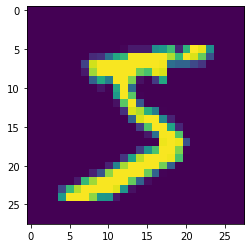

In [6]:
plt.imshow(single_image)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train.shape

(60000,)

In [10]:
y_example=to_categorical(y_train)

In [12]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_cat_test=to_categorical(y_test,num_classes=10)

In [16]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
y_cat_train=to_categorical(y_train)

In [40]:
y_cat_train.shape

(60000, 10)

In [19]:
single_image.max()

255

In [20]:
x_train=x_train/255

In [21]:
x_test=x_test/255

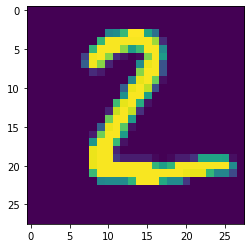

In [23]:
plt.imshow(x_test[1])

In [26]:
#size of the batch size
x_train=x_train.reshape(60000,28,28,1)

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_test=x_test.reshape(10000,28,28,1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

In [30]:
from tensorflow.keras.models import Sequential

In [31]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [44]:
model=Sequential()

In [45]:
model.add(Conv2D(filters=32,kernel_size=(4,4),
                 input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stop=EarlyStopping(monitor='val_loss',patience=1)

In [48]:
model.fit(x_train,y_cat_train,epochs=10,
          validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1443 - accuracy: 0.9573 - val_loss: 0.0654 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0411 - val_accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.0348 - val_accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0386 - val_accuracy: 0.9868


In [49]:
metrics=pd.DataFrame(model.history.history)

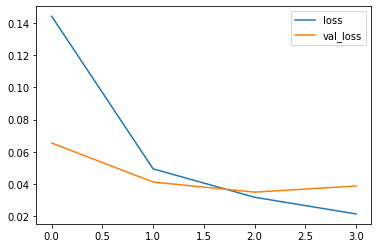

In [53]:
metrics[['loss','val_loss']].plot()

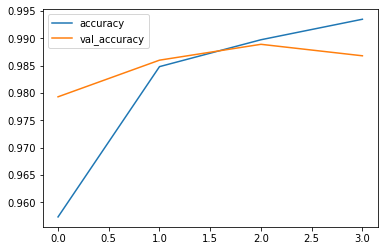

In [54]:
metrics[['accuracy','val_accuracy']].plot()

In [55]:
model.metrics_names

['loss', 'accuracy']

In [56]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.038630880415439606, 0.9868000149726868]

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

In [61]:
y_cat_test.shape

(10000, 10)

In [63]:
pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [66]:
print(confusion_matrix(y_test,pred))

[[ 975    0    0    1    0    1    3    0    0    0]
 [   1 1122    2    1    1    2    3    1    2    0]
 [   3    0 1011    3    1    0    3    7    4    0]
 [   1    0    1 1001    0    2    0    3    2    0]
 [   0    1    0    0  971    0    1    0    1    8]
 [   1    0    0   11    0  874    3    0    2    1]
 [   4    1    0    0    2    3  947    0    1    0]
 [   0    1    4    1    0    0    0 1018    1    3]
 [   4    0    1    3    0    0    0    3  959    4]
 [   0    1    0    4    7    3    0    1    3  990]]


In [67]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


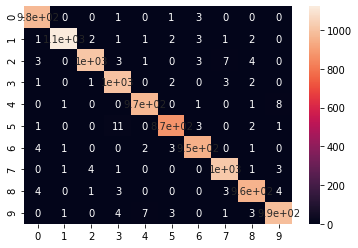

In [70]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [71]:
number=x_test[0]

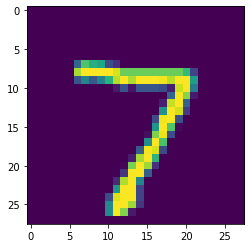

In [73]:
plt.imshow(number.reshape(28,28))

In [74]:
model.predict_classes(number.reshape(1,28,28,1))

array([7])